Saving StatewiseTestingDetails.csv to StatewiseTestingDetails.csv
For positive cases:
0.9951777412287951


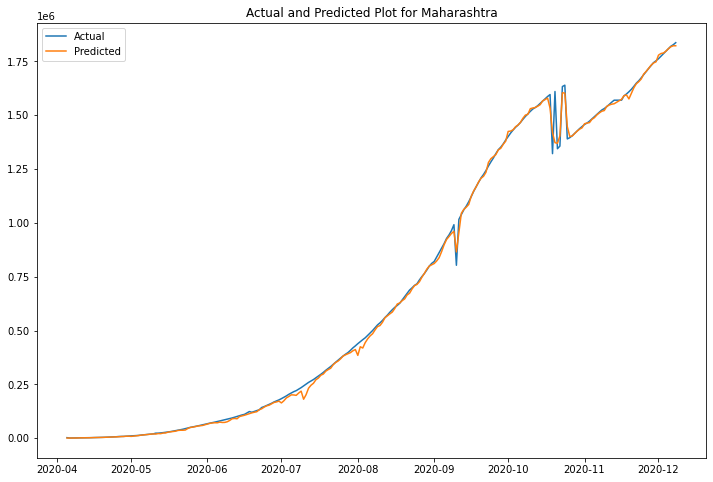

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#reading_data
from google.colab import files
uploaded = files.upload()
import io

cases_data = pd.read_csv(io.BytesIO(uploaded['StatewiseTestingDetails.csv']),parse_dates=['Date'])
#cases_data.dtypes
cases_data[cases_data['Negative']==" "]

cases_data = cases_data.drop(index=[5322])
cases_data['Negative'] = cases_data['Negative'].astype('float')
cases_data = cases_data.sort_values('Date').reset_index(drop=True)
#cases_data
states_ratios = {}
for i in cases_data['State'].unique():
  t = cases_data[cases_data['State']==i]
  t = t.dropna(subset=['Negative', 'Positive', 'TotalSamples'])
  t['pos_ratio'] = t['Positive']/t['TotalSamples']
  t['neg_ratio'] = t['Negative']/t['TotalSamples']
  states_ratios[i] = [t['pos_ratio'].mean(), t['neg_ratio'].mean()]
#print(states_ratios)  
cases_data2 = cases_data.copy()
#cases_data2
cases_data2 = cases_data2.reset_index(drop=True)
for j in range(len(cases_data2)):
  if (pd.isnull(cases_data2.loc[j, 'Negative'])):
    cases_data2.loc[j, 'Negative'] = cases_data2.loc[j, 'TotalSamples']*states_ratios[cases_data2.loc[j,'State']][1]
  if (pd.isnull(cases_data2.loc[j, 'Positive'])):
    cases_data2.loc[j, 'Positive'] = cases_data2.loc[j, 'TotalSamples']*states_ratios[cases_data2.loc[j, 'State']][0]
cases_data2[pd.isnull(cases_data2['Negative'])]
states_ratios['Mizoram']
for k in cases_data2[cases_data['State']=='Manipur'].index:
  if (pd.isnull(cases_data2.loc[k, 'Negative'])):
    cases_data2.loc[k, 'Negative'] = cases_data2.loc[k, 'TotalSamples']*0.0001
  if (pd.isnull(cases_data2.loc[k, 'Positive'])):
    cases_data2.loc[k, 'Positive'] = cases_data2.loc[k, 'TotalSamples']*0.017241379310344827
#As we have Nan for Manipur we use data for Mizorzm considering nearby states    
#cases_data2.isnull().sum()
cases_data2['Negative'] = cases_data2['Negative'].astype('int')
cases_data2['Positive'] = cases_data2['Positive'].astype('int')
#cases_data2
cases_data3 = cases_data2.copy()
#cases_data3.index = cases_data3['Date']
#cases_data3.drop('Date', axis=1)
#cases_data3
cases_data3['year'] = cases_data3['Date'].apply(lambda x: x.year)
cases_data3['month'] = cases_data3['Date'].apply(lambda x: x.month)
cases_data3['day'] = cases_data3['Date'].apply(lambda x: x.day)
#cases_data3
cases_data4 = cases_data3.copy()
cases_data3 = cases_data3.drop('Date', axis=1)
cases_data3 = cases_data3[['day', 'month', 'year', 'State', 'TotalSamples', 'Negative', 'Positive']]
#cases_data3
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
state_change = LabelEncoder()
cases_data3['State'] = state_change.fit_transform(cases_data3['State'])
X_train,X_test,y_train,y_test = train_test_split(cases_data3.drop(['Negative','Positive'],axis=1),cases_data3[['Negative','Positive']],stratify=cases_data3['State'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#plt.figure(figsize=(10,8))
#sns.heatmap(cases_data3.corr(),annot=True)
#covid_model = RandomForestRegressor()
#covid_model.fit(X_train,y_train)
#print(covid_model.score(X_test,y_test))
covid_model_pos = RandomForestRegressor()
covid_model_pos.fit(X_train,y_train['Positive'])
print("For positive cases:")
print(covid_model_pos.score(X_test,y_test['Positive']))
def StateData(s):
  return cases_data4[cases_data4['State']==s]
def state_prediction(d,s):
  s1 = state_change.transform([s])[0]
  d1 = d.copy()
  d1.loc[:,'State'] = s1
  predict_cases = covid_model_pos.predict(d1[['day','month','year','State','TotalSamples']])
  return predict_cases
def plot_predict_state(s):
  Sta = StateData(s)
  plt.figure(figsize=(12,8))
  plt.plot(Sta['Date'],Sta['Positive'],label="Actual")
  plt.plot(Sta['Date'],state_prediction(Sta,s),label="Predicted")
  plt.legend()
  plt.title(f"Actual and Predicted Plot for {s}")
  plt.show()
plot_predict_state('Maharashtra')      